In [111]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Data Reading & Observation

In [2]:
train = pd.read_csv('/Users/zoey/WPI/kdd/hw2/census/census-income.data',header=None)
test = pd.read_csv('/Users/zoey/WPI/kdd/hw2/census/census-income.test',header=None)

In [4]:
train_0 = train.drop([24],axis=1)
test_0 = test.drop([24],axis=1)

In [5]:
train_0.columns = range(0,41)
test_0.columns = range(0,41)

In [6]:
train_0

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,- 50000.
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [7]:
test_0

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.
5,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
6,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Mexico,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
7,61,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
8,38,Private,45,12,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Other professional services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
9,7,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [8]:
train_0.shape

(199523, 41)

In [9]:
test_0.shape

(99762, 41)

In [10]:
train_0.dtypes

0      int64
1     object
2      int64
3      int64
4     object
5      int64
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16     int64
17     int64
18     int64
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29     int64
30    object
31    object
32    object
33    object
34    object
35     int64
36    object
37     int64
38     int64
39     int64
40    object
dtype: object

In [11]:
train_0[40].value_counts()

 - 50000.    187141
 50000+.      12382
Name: 40, dtype: int64

In [12]:
test_0[40].value_counts()

 - 50000.    93576
 50000+.      6186
Name: 40, dtype: int64

In [13]:
train_0.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
dtype: bool

In [14]:
test_0.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
dtype: bool

In [15]:
train_0 = train_0.drop_duplicates()
test_0 = test_0.drop_duplicates()

In [16]:
train_0.shape

(152896, 41)

In [17]:
test_0.shape

(78864, 41)

# Data Preprocessing

Transfer string attributes to int

In [15]:
def NomToNum(dataset, column):
#     newdata = dataset[:]
    column_lst = dataset[column].unique().tolist()
    le = LabelEncoder()
    le.fit(column_lst)
    dataset[column] = le.transform(dataset[column])
    return dataset

In [16]:
nom2num_lst = [1,4,6,7,8,9,10,11,12,13,14,15,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,36,40]

In [17]:
train_1 = train_0[:]
test_1 = test_0[:]

In [18]:
for i in nom2num_lst:
    train_1 = NomToNum(train_1, i)
    test_1 = NomToNum(test_1, i)

In [19]:
train_1.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
35    int64
36    int64
37    int64
38    int64
39    int64
40    int64
dtype: object

In [24]:
test_1.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
35    int64
36    int64
37    int64
38    int64
39    int64
40    int64
dtype: object

one-hot encoding

In [222]:
def onehot(data,columns):
    newdata = data[:]
    x = newdata[columns]
    ohe = OneHotEncoder()
    ohe.fit(x)
    newx = ohe.transform(x).toarray()
    for i in range(len(columns)):
        clm_name = newdata[columns[i]].unique().tolist()
        for j in range(len(clm_name)):
            col_name = str(columns[i]) +"_"+ str(clm_name[j])
            newdata[col_name] = newx[:, i]
    newdata = newdata.drop(columns, axis=1)
    return newdata

In [223]:
nominal_lst = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,39]

In [224]:
train_2 = onehot(train_1, nominal_lst)
test_2 = onehot(test_1, nominal_lst)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/zoey/.local

In [225]:
def getmatshow(data):
    datacorr = data.corr()
    plt.matshow(datacorr)
    plt.show()
    return datacorr

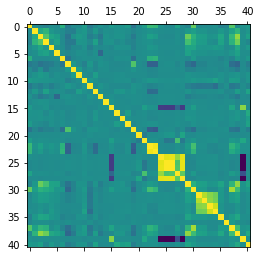

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.000000,-0.020052,-0.058971,-0.093249,-0.003462,-0.013393,0.265512,-0.160447,-0.014995,-0.016074,...,-0.033694,-0.018568,-0.005584,0.024025,-0.100392,-0.065915,0.473668,-0.022852,0.033110,0.098788
1,-0.020052,1.000000,0.226445,0.310896,0.066348,0.010913,-0.007514,-0.105065,-0.113112,0.045147,...,0.053827,0.051611,0.005688,0.005867,0.084597,0.015789,0.159749,0.313429,0.008193,0.068962
2,-0.058971,0.226445,1.000000,0.456712,0.187555,0.130676,-0.014160,-0.211029,0.027796,0.104433,...,0.138205,0.131124,0.045473,0.063295,0.197885,0.016914,0.334689,0.679662,0.024806,0.149585
3,-0.093249,0.310896,0.456712,1.000000,0.061801,0.164644,-0.017360,-0.160342,-0.153954,0.058108,...,0.117827,0.110198,0.016204,-0.008988,0.174755,0.012699,0.301696,0.561844,0.014361,-0.051978
4,-0.003462,0.066348,0.187555,0.061801,1.000000,0.043426,-0.003710,-0.127714,-0.031722,-0.020707,...,0.065441,0.062719,0.066095,0.108222,0.073775,-0.018283,0.008074,0.223455,0.002959,0.097236
5,-0.013393,0.010913,0.130676,0.164644,0.043426,1.000000,0.007337,-0.052194,-0.021899,0.021082,...,0.047758,0.043236,0.025264,0.029246,0.035465,0.003240,0.070985,0.163749,0.007033,0.008950
6,0.265512,-0.007514,-0.014160,-0.017360,-0.003710,0.007337,1.000000,-0.195186,-0.048644,-0.006714,...,-0.019291,-0.013439,-0.014538,-0.014736,-0.079386,-0.013286,-0.080960,0.072516,0.000303,0.073463
7,-0.160447,-0.105065,-0.211029,-0.160342,-0.127714,-0.052194,-0.195186,1.000000,0.074966,-0.013097,...,-0.077127,-0.077024,-0.015035,-0.022086,-0.037418,0.016967,-0.249120,-0.305712,-0.015374,-0.123874
8,-0.014995,-0.113112,0.027796,-0.153954,-0.031722,-0.021899,-0.048644,0.074966,1.000000,0.121042,...,-0.028518,-0.028598,-0.011232,-0.003677,-0.047501,-0.005366,-0.073696,-0.148741,-0.007386,-0.054112
9,-0.016074,0.045147,0.104433,0.058108,-0.020707,0.021082,-0.006714,-0.013097,0.121042,1.000000,...,0.012946,0.012434,-0.005485,0.000788,0.035468,0.001285,0.033596,0.062300,0.002503,0.055517


In [226]:
getmatshow(train_1)

In [227]:
getmatshow(train_2)

KeyboardInterrupt: 

Cut continuous attributes

In [41]:
from sklearn.cluster import KMeans

In [42]:
train_cut = train_1[:]
test_cut = test_1[:]

In [43]:
continuous_clm = [0,5,16,17,18,38]

In [44]:
def kmeans_cut(data,column,k,data_test):
    kmodel = KMeans(n_clusters = k, n_jobs = 4) #建立模型，n_jobs是并行数，一般等于CPU数较好
    kmodel.fit(data[[column]]) #训练模型
    kmean_center = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)  #输出聚类中心，并且排序（默认是随机序的）
    bins = kmean_center.rolling(window=2).mean().iloc[1:]
    bins = [-99999] + list(bins[0]) + [data[column].max()] #把首末边界点加上，w[0]中0为列索引
    data['new_'+str(k)+'cuted_'+str(column)] = pd.cut(data[column],bins,labels=range(k))
    data_test['new_'+str(k)+'cuted_'+str(column)] = pd.cut(data_test[column],bins,labels=range(k))
#     print(bins)
    return data,data_test

In [45]:
for i in continuous_clm:
#     print(i)
    train_cut,test_cut = kmeans_cut(train_cut,i,10,test_cut)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [47]:
train_cut

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,new_10cuted_0,new_10cuted_5,new_10cuted_16,new_10cuted_17,new_10cuted_18,new_10cuted_38
0,73,3,0,0,12,0,2,6,14,6,...,2,0,95,0,8,0,0,0,0,0
1,58,6,4,34,16,0,2,0,4,8,...,2,52,94,0,6,0,0,0,0,9
2,18,3,0,0,0,0,1,4,14,6,...,2,0,95,0,1,0,0,0,0,0
3,9,3,0,0,10,0,2,4,14,6,...,0,0,94,0,0,0,0,0,0,0
4,10,3,0,0,10,0,2,4,14,6,...,0,0,94,0,0,0,0,0,0,0
5,48,4,40,10,16,1200,2,2,6,10,...,2,52,95,0,5,3,0,0,0,9
6,42,4,34,3,9,0,2,2,7,2,...,2,52,94,0,4,0,2,0,0,9
7,28,4,4,40,12,0,2,4,4,4,...,2,30,95,0,2,0,0,0,0,5
8,47,1,43,26,16,876,2,2,5,0,...,2,52,95,0,5,2,0,0,0,9
9,34,4,4,37,16,0,2,2,4,5,...,2,52,94,0,3,0,0,0,0,9


In [46]:
train_classifier = train_cut.drop(continuous_clm,axis=1)
test_classifier = test_cut.drop(continuous_clm,axis=1)

In [49]:
test_classifier

,1,2,3,4,6,7,8,9,10,11,...,36,37,39,40,new_10cuted_0,new_10cuted_5,new_10cuted_16,new_10cuted_17,new_10cuted_18,new_10cuted_38
0,4,6,36,3,2,2,10,5,4,5,...,1,2,95,0,4,0,0,0,0,2
1,6,37,12,8,2,2,2,10,4,0,...,1,2,95,0,5,0,0,0,1,4
2,3,0,0,10,2,4,14,6,4,6,...,1,0,95,0,0,0,0,0,0,0
3,4,29,3,12,2,0,21,2,4,0,...,1,2,94,0,3,0,0,0,0,9
4,4,4,34,12,2,0,4,8,4,0,...,1,2,95,0,5,0,0,0,0,9
5,3,0,0,10,2,4,14,6,4,0,...,1,0,94,0,1,0,0,0,0,0
6,3,0,0,10,2,4,14,6,4,6,...,1,0,94,0,0,0,0,0,0,0
7,3,0,0,12,2,2,14,6,4,0,...,1,2,95,0,7,0,0,0,0,0
8,4,45,12,14,2,2,15,10,2,0,...,1,2,94,0,4,0,0,0,0,9
9,3,0,0,10,2,4,14,6,4,0,...,1,0,94,0,0,0,0,0,0,0


# Classification
# 1. Zero-R

In [340]:
def zero_r_classifier(train_classifier, test_classifier, label_clm):
    output_values = list(train_classifier[label_clm])
    prediction = max(set(output_values), key=output_values.count)
    predicted_label = [prediction for i in range(len(test_classifier))]
    test_label = list(test_classifier[label_clm])
    print("Accuracy using OneR:")
    print (accuracy_score(test_label,predicted_label)*100) 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label, predicted_label)
    print("AUC : ",auc(false_positive_rate, true_positive_rate))
    print("Report : ", 
    classification_report(test_label, predicted_label)) 

In [341]:
zero_r_classifier(train_classifier, test_classifier,40)

Accuracy using OneR:
92.15611685940353
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     72678
           1       0.00      0.00      0.00      6186

    accuracy                           0.92     78864
   macro avg       0.46      0.50      0.48     78864
weighted avg       0.85      0.92      0.88     78864



/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 2.One-R

In [211]:
class OneR(object):
    
    def __init__(self):
        self.ideal_variable = None
        self.max_accuracy = 0
        self.best_rules = []
    
    def fit(self, dfx, y):
        response = list()
        result = dict()
        
        for i in dfx:
            result[str(i)] = dict()
            options_values = set(dfx[i])
            join_data = pd.DataFrame({"variable":dfx[i], "label":y})
            cross_table = pd.crosstab(join_data.variable, join_data.label)
            summary = cross_table.idxmax(axis=1)
            result[str(i)] = dict(summary)
            
            counts = 0
            
            for idx, row in join_data.iterrows():
                if row['label'] == result[str(i)][row['variable']]:
                    counts += 1

            accuracy = (counts/len(y))
            
            if accuracy > self.max_accuracy:
                self.max_accuracy = accuracy
                self.ideal_variable = i
                self.best_rules = result[str(i)]

            result_feature = {"variable": str(i), "accuracy":accuracy, "rules": result[str(i)] }  
            response.append(result_feature)
            
        return response

    
    def predict(self, X=None):
        self_ideal_variable = self.ideal_variable + 1
        
    def __repr__(self):
        if self.ideal_variable != None:
            txt = "Attributes with highest accuracy: " + str(self.ideal_variable)
        else:
            txt = "Error"
        return txt

In [344]:
def one_r_classifier(train_classifier):
    y_classifier = train_classifier[40]
    x_classifier = train_classifier.drop([40],axis=1)
    
    clf_oner = OneR()
    accuracy_items = list()
    

    clf_oner.fit(x_classifier, y_classifier)
    
    a = clf_oner.ideal_variable
    b = clf_oner.max_accuracy
    result = clf_oner.fit(x_classifier, y_classifier)
    
    return a,b,result
    

In [345]:
one_r_classifier(train_classifier)

('new_10cuted_16',
 0.9266233256592716,
 [{'variable': '1',
   'accuracy': 0.9191149539556299,
   'rules': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}},
  {'variable': '2',
   'accuracy': 0.9191149539556299,
   'rules': {0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0,
    10: 0,
    11: 0,
    12: 0,
    13: 0,
    14: 0,
    15: 0,
    16: 0,
    17: 0,
    18: 0,
    19: 0,
    20: 0,
    21: 0,
    22: 0,
    23: 0,
    24: 0,
    25: 0,
    26: 0,
    27: 0,
    28: 0,
    29: 0,
    30: 0,
    31: 0,
    32: 0,
    33: 0,
    34: 0,
    35: 0,
    36: 0,
    37: 0,
    38: 0,
    39: 0,
    40: 0,
    41: 0,
    42: 0,
    43: 0,
    44: 0,
    45: 0,
    46: 0,
    47: 0,
    48: 0,
    49: 0,
    50: 0,
    51: 0}},
  {'variable': '3',
   'accuracy': 0.9222020196735036,
   'rules': {0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 1,
    8: 0,
    9: 0,
    10: 0,
    11: 1,
    12: 0,
    13: 0,


In [352]:
# 'new_10cuted_16',
#  0.9266233256592716,
# rules= {0: 0, 2: 0, 1: 0, 3: 0, 5: 1, 4: 1, 6: 1, 9: 1, 7: 0, 8: 1}
def one_r_result(train_classifier):
    rules= {0: 0, 2: 0, 1: 0, 3: 0, 5: 1, 4: 1, 6: 1, 9: 1, 7: 0, 8: 1}
    predicted_label = []
    for i in list(train_classifier['new_10cuted_16']):
        predicted_label.append(rules[i])
        
    test_label = list(train_classifier[40])
    print("Accuracy using OneR:")
    print (accuracy_score(test_label,predicted_label)*100) 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label, predicted_label)
    print("AUC : ",auc(false_positive_rate, true_positive_rate))
    print("Report : ", 
    classification_report(test_label, predicted_label)) 

In [353]:
one_r_result(train_classifier)

Accuracy using OneR:
92.66233256592716
AUC :  0.5582866893134464
Report :                precision    recall  f1-score   support

           0       0.93      1.00      0.96    140529
           1       0.82      0.12      0.21     12367

    accuracy                           0.93    152896
   macro avg       0.87      0.56      0.58    152896
weighted avg       0.92      0.93      0.90    152896



Cross Validation

In [166]:
def CrossValidation(train_classifier,k):
    y_cv = train_classifier[40].values
    X_cv = train_classifier.drop([40],axis=1).values
    kf = KFold(n_splits=k)
    kf.get_n_splits(X_cv)
    X_train_lst = []
    X_test_lst = []
    y_train_lst = []
    y_test_lst = []
    for train_index, test_index in kf.split(X_cv):
        X_train, X_test = X_cv[train_index], X_cv[test_index]
        y_train, y_test = y_cv[train_index], y_cv[test_index]
        X_train_lst.append(X_train)
        X_test_lst.append(X_test)
        y_train_lst.append(y_train)
        y_test_lst.append(y_test)
    return(X_train_lst,X_test_lst,y_train_lst,y_test_lst)

In [168]:
X_train_lst,X_test_lst,y_train_lst,y_test_lst = CrossValidation(train_classifier,10)

Plot ROC

In [70]:
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')

# 3.Decision Trees

In [328]:
def DTclassifier(train_classifier,test_classifier): 
        y_train = train_classifier[40].values
        X_train = train_classifier.drop([40],axis=1).values
        y_test = test_classifier[40].values
        X_test = test_classifier.drop([40],axis=1).values
        
        clfDT=tree.DecisionTreeClassifier(random_state=100)
        clfDT.fit(X_train,y_train)
        
        print("Results Using Decision Tree:") 
        y_pred_DT=clfDT.predict(X_test)
        print("Confusion Matrix: ", 
            confusion_matrix(y_test, y_pred_DT)) 

        print ("Accuracy : ", 
        accuracy_score(y_test,y_pred_DT)*100) 
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_DT)
        print("AUC : ",auc(false_positive_rate, true_positive_rate))
        
        print("Report : ", 
        classification_report(y_test, y_pred_DT)) 

In [329]:
DTclassifier(train_classifier,test_classifier)

Results Using Decision Tree:
Confusion Matrix:  [[68964  3714]
 [ 3275  2911]]
Accuracy :  91.13790829782917
AUC :  0.7097383022341963
Report :                precision    recall  f1-score   support

           0       0.95      0.95      0.95     72678
           1       0.44      0.47      0.45      6186

    accuracy                           0.91     78864
   macro avg       0.70      0.71      0.70     78864
weighted avg       0.91      0.91      0.91     78864



experiments in DT

In [302]:
def DTclassifier_1(train_classifier,test_classifier): 
        y_train = train_classifier[40].values
        X_train = train_classifier.drop([40],axis=1).values
        y_test = test_classifier[40].values
        X_test = test_classifier.drop([40],axis=1).values

        
        clfDT=tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=10,max_depth=50,random_state=100)
        clfDT.fit(X_train,y_train)
        
        print("Results Using Decision Tree:") 
        y_pred_DT=clfDT.predict(X_test)
        print("Confusion Matrix: ", 
            confusion_matrix(y_test, y_pred_DT)) 

        print ("Accuracy : ", 
        accuracy_score(y_test,y_pred_DT)*100) 
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_DT)
        print("AUC : ",auc(false_positive_rate, true_positive_rate))

        print("Report : ", 
        classification_report(y_test, y_pred_DT)) 

In [303]:
DTclassifier_1(train_classifier,test_classifier)

Results Using Decision Tree:
Confusion Matrix:  [[71300  1378]
 [ 3565  2621]]
Accuracy :  93.73224792047068
AUC :  0.7023691643959782
Report :                precision    recall  f1-score   support

           0       0.95      0.98      0.97     72678
           1       0.66      0.42      0.51      6186

    accuracy                           0.94     78864
   macro avg       0.80      0.70      0.74     78864
weighted avg       0.93      0.94      0.93     78864



In [304]:
def DTclassifier_cv1(train_classifier): 
        X_train_lst,X_test_lst,y_train_lst,y_test_lst = CrossValidation(train_classifier,10)
        Accuracy_lst = []
        AUC_lst = []
        for i in range(len(y_test_lst)):
            y_train = y_train_lst[i]
            X_train = X_train_lst[i]
            y_test = y_test_lst[i]
            X_test = X_test_lst[i]
        
            clfDT=tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=10,max_depth=50,random_state=100)
            clfDT.fit(X_train,y_train)
            
            print("Cross Validation Round: "+str(i+1))
            print("Results Using Decision Tree after change Parameters:") 
            y_pred_DT=clfDT.predict(X_test)
            print("Confusion Matrix: ", 
                confusion_matrix(y_test, y_pred_DT)) 

            print ("Accuracy : ", 
            accuracy_score(y_test,y_pred_DT)*100) 
            
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_DT)
            print("AUC : ",auc(false_positive_rate, true_positive_rate))
        
            print("Report : ", 
            classification_report(y_test, y_pred_DT)) 
            
            AUC_lst.append(auc(false_positive_rate, true_positive_rate))
            Accuracy_lst.append(accuracy_score(y_test,y_pred_DT)*100)
            
        Accuracy_avg = np.mean(Accuracy_lst)
        AUC_avg = np.mean(AUC_lst)
        print('average Accuracy after cross validation:',Accuracy_avg)
        print('average AUC after cross validation:',AUC_avg)
        return AUC_lst

In [305]:
DTclassifier_cv1(train_classifier)

Cross Validation Round: 1
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[13923   274]
 [  625   468]]
Accuracy :  94.12034009156312
AUC :  0.7044397354414464
Report :                precision    recall  f1-score   support

           0       0.96      0.98      0.97     14197
           1       0.63      0.43      0.51      1093

    accuracy                           0.94     15290
   macro avg       0.79      0.70      0.74     15290
weighted avg       0.93      0.94      0.94     15290

Cross Validation Round: 2
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[13822   313]
 [  683   472]]
Accuracy :  93.48593852190974
AUC :  0.6932571967591423
Report :                precision    recall  f1-score   support

           0       0.95      0.98      0.97     14135
           1       0.60      0.41      0.49      1155

    accuracy                           0.93     15290
   macro avg       0.78      0.69      0.73     15290
weighted av

[0.7044397354414464,
 0.6932571967591423,
 0.7014495092975207,
 0.6905048291399002,
 0.698325051318009,
 0.7133695430154663,
 0.6995727636240046,
 0.7000086964158221,
 0.7026031025989747,
 0.6851912198099873]

# 4.Random Forest

In [306]:
def RFclassifier(train_classifier,test_classifier): 
        y_train = train_classifier[40].values
        X_train = train_classifier.drop([40],axis=1).values
        y_test = test_classifier[40].values
        X_test = test_classifier.drop([40],axis=1).values
        
        clfRF=RandomForestClassifier(n_estimators=100)
        clfRF.fit(X_train,y_train)
        
        print("Results Using Random Forest:") 
        y_pred_RF=clfRF.predict(X_test)
        print("Confusion Matrix: ", 
            confusion_matrix(y_test, y_pred_RF)) 

        print ("Accuracy : ", 
        accuracy_score(y_test,y_pred_RF)*100) 
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_RF)
        print("AUC : ",auc(false_positive_rate, true_positive_rate))

        print("Report : ", 
        classification_report(y_test, y_pred_RF)) 

In [307]:
RFclassifier(train_classifier,test_classifier)

Results Using Random Forest:
Confusion Matrix:  [[71774   904]
 [ 3763  2423]]
Accuracy :  94.08221748833435
AUC :  0.6896262439674848
Report :                precision    recall  f1-score   support

           0       0.95      0.99      0.97     72678
           1       0.73      0.39      0.51      6186

    accuracy                           0.94     78864
   macro avg       0.84      0.69      0.74     78864
weighted avg       0.93      0.94      0.93     78864



experiments in RF

In [95]:
def RFclassifier_1(train_classifier,test_classifier): 
        y_train = train_classifier[40].values
        X_train = train_classifier.drop([40],axis=1).values
        y_test = test_classifier[40].values
        X_test = test_classifier.drop([40],axis=1).values
        
        clfRF=RandomForestClassifier(max_features='sqrt',n_estimators=100,random_state=100)
        clfRF.fit(X_train,y_train)
        
        print("Results Using Random Forest after change Parameters:") 
        y_pred_RF=clfRF.predict(X_test)
        y_pred_prob = clfRF.predict_proba(X_test)[:,1]
        print("Confusion Matrix: ", 
            confusion_matrix(y_test, y_pred_RF)) 

        print ("Accuracy : ", 
        accuracy_score(y_test,y_pred_RF)*100) 
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_RF)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print("AUC : ",auc(false_positive_rate, true_positive_rate))

        print("Report : ", 
        classification_report(y_test, y_pred_RF)) 
        
        plot_roc(y_test, y_pred_RF)
        plot_roc(y_test, y_pred_prob)

Results Using Random Forest after change Parameters:
Confusion Matrix:  [[71791   887]
 [ 3781  2405]]
Accuracy :  94.0809494826537
AUC :  0.688288300046851
Report :                precision    recall  f1-score   support

           0       0.95      0.99      0.97     72678
           1       0.73      0.39      0.51      6186

    accuracy                           0.94     78864
   macro avg       0.84      0.69      0.74     78864
weighted avg       0.93      0.94      0.93     78864



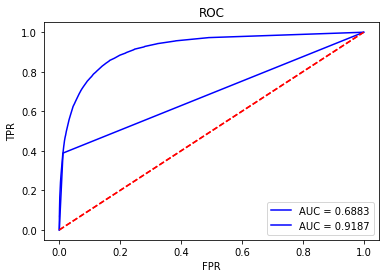

In [96]:
RFclassifier_1(train_classifier,test_classifier)

In [336]:
def RFclassifier_cv1(train_classifier): 
        X_train_lst,X_test_lst,y_train_lst,y_test_lst = CrossValidation(train_classifier,10)
        AUC_lst = []
        Accuracy_lst=[]
        for i in range(len(y_test_lst)):
            y_train = y_train_lst[i]
            X_train = X_train_lst[i]
            y_test = y_test_lst[i]
            X_test = X_test_lst[i]
        
            clfRF=RandomForestClassifier(max_features='sqrt',n_estimators=100,random_state=100)
            clfRF.fit(X_train,y_train)
            print("Cross Validation Round: "+str(i+1))
            print("Results Using Random Forest after change Parameters:") 
            y_pred_RF=clfRF.predict(X_test)
            print("Confusion Matrix: ", 
                confusion_matrix(y_test, y_pred_RF)) 

            print ("Accuracy : ", 
            accuracy_score(y_test,y_pred_RF)*100) 
            
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_RF)
            print("AUC : ",auc(false_positive_rate, true_positive_rate))

            print("Report : ", 
            classification_report(y_test, y_pred_RF)) 

            AUC_lst.append(auc(false_positive_rate, true_positive_rate))
            Accuracy_lst.append(accuracy_score(y_test,y_pred_RF)*100)
            
        Accuracy_avg = np.mean(Accuracy_lst)
        AUC_avg = np.mean(AUC_lst)
        print('average Accuracy after cross validation:',Accuracy_avg)
        print('average AUC after cross validation:',AUC_avg)
        return AUC_lst

In [337]:
RFclassifier_cv1(train_classifier)

Cross Validation Round: 1
Results Using Random Forest after change Parameters:
Confusion Matrix:  [[14000   197]
 [  642   451]]
Accuracy :  94.51275343361675
AUC :  0.6993748147634504
Report :                precision    recall  f1-score   support

           0       0.96      0.99      0.97     14197
           1       0.70      0.41      0.52      1093

    accuracy                           0.95     15290
   macro avg       0.83      0.70      0.74     15290
weighted avg       0.94      0.95      0.94     15290

Cross Validation Round: 2
Results Using Random Forest after change Parameters:
Confusion Matrix:  [[13930   205]
 [  675   480]]
Accuracy :  94.24460431654677
AUC :  0.7005407044317551
Report :                precision    recall  f1-score   support

           0       0.95      0.99      0.97     14135
           1       0.70      0.42      0.52      1155

    accuracy                           0.94     15290
   macro avg       0.83      0.70      0.75     15290
weighted av

[0.6993748147634504,
 0.7005407044317551,
 0.7009458935950413,
 0.6909428533190579,
 0.6992624941568603,
 0.7016507458467741,
 0.6950649693544009,
 0.7018618313454182,
 0.7067157846667935,
 0.6886704163666587]

# Experiment: Increase Dimension

In [244]:
addDimension_lst = list(train_classifier.drop([40],axis=1).columns)

In [241]:
train_addDim = train_classifier[:]
train_addDim[['new_10cuted_0','new_10cuted_5','new_10cuted_16','new_10cuted_17','new_10cuted_18','new_10cuted_38']] = train_addDim[['new_10cuted_0','new_10cuted_5','new_10cuted_16',
                                 'new_10cuted_17','new_10cuted_18','new_10cuted_38']].astype(int)

In [243]:
test_addDim = test_classifier[:]
test_addDim[['new_10cuted_0','new_10cuted_5','new_10cuted_16','new_10cuted_17','new_10cuted_18','new_10cuted_38']] = test_addDim[['new_10cuted_0','new_10cuted_5','new_10cuted_16',
                                 'new_10cuted_17','new_10cuted_18','new_10cuted_38']].astype(int)

In [250]:
def onehot(data,columns):
    newdata = data[:]
    x = newdata[columns]
    ohe = OneHotEncoder()
    ohe.fit(x)
    newx = ohe.transform(x).toarray()
    for i in range(len(columns)):
        clm_name = newdata[columns[i]].unique().tolist()
        for j in range(len(clm_name)):
            col_name = str(columns[i]) +"_"+ str(clm_name[j])
            newdata[col_name] = newx[:, i]
    newdata = newdata.drop(columns, axis=1)
    return newdata

In [251]:
train_addDim = onehot(train_addDim, addDimension_lst)
test_addDim = onehot(test_addDim, addDimension_lst)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/zoey/.local

In [338]:
DTclassifier_cv1(train_addDim)

Cross Validation Round: 1
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[14194     3]
 [ 1092     1]]
Accuracy :  92.83845650752126
AUC :  0.5003518004170951
Report :                precision    recall  f1-score   support

           0       0.93      1.00      0.96     14197
           1       0.25      0.00      0.00      1093

    accuracy                           0.93     15290
   macro avg       0.59      0.50      0.48     15290
weighted avg       0.88      0.93      0.89     15290

Cross Validation Round: 2
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[14134     1]
 [ 1153     2]]
Accuracy :  92.45258338783519
AUC :  0.5008304276786767
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     14135
           1       0.67      0.00      0.00      1155

    accuracy                           0.92     15290
   macro avg       0.80      0.50      0.48     15290
weighted av

[0.5003518004170951,
 0.5008304276786767,
 0.5010976239669421,
 0.50078125,
 0.5008116883116883,
 0.5007599146482824,
 0.5015300559535947,
 0.5003290951849798,
 0.5007376707122374,
 0.5014825796886583]

In [339]:
RFclassifier_cv1(train_addDim)

Cross Validation Round: 1
Results Using Random Forest after change Parameters:
Confusion Matrix:  [[14194     3]
 [ 1090     3]]
Accuracy :  92.85153695225638
AUC :  0.5012667135003522
Report :                precision    recall  f1-score   support

           0       0.93      1.00      0.96     14197
           1       0.50      0.00      0.01      1093

    accuracy                           0.93     15290
   macro avg       0.71      0.50      0.48     15290
weighted avg       0.90      0.93      0.89     15290

Cross Validation Round: 2
Results Using Random Forest after change Parameters:
Confusion Matrix:  [[14130     5]
 [ 1151     4]]
Accuracy :  92.43950294310007
AUC :  0.501554735795981
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     14135
           1       0.44      0.00      0.01      1155

    accuracy                           0.92     15290
   macro avg       0.68      0.50      0.48     15290
weighted avg

[0.5012667135003522,
 0.501554735795981,
 0.5014398243801653,
 0.5015268112062812,
 0.5019225199682946,
 0.5010507962224058,
 0.5013876058111446,
 0.5018591511385747,
 0.501052919329288,
 0.5018532246108228]

# Experiment: Decrease Dimension

feature selection

In [368]:
def L1FeatureSelect(train_classifier):
    y_train = train_classifier[40].values
    X_train = train_classifier.drop([40],axis=1).values
    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
    model = SelectFromModel(lsvc, prefit=True)
    X_new = model.transform(X_train)
    train_decDim = pd.DataFrame(X_new)
    train_decDim[40] = y_train
    return train_decDim

In [369]:
train_decDim = L1FeatureSelect(train_classifier)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [374]:
train_decAddedDim = L1FeatureSelect(train_addDim)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [366]:
DTclassifier_cv1(train_decDim)

Cross Validation Round: 1
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[13925   272]
 [  613   480]]
Accuracy :  94.21190320470896
AUC :  0.7099996513573444
Report :                precision    recall  f1-score   support

           0       0.96      0.98      0.97     14197
           1       0.64      0.44      0.52      1093

    accuracy                           0.94     15290
   macro avg       0.80      0.71      0.74     15290
weighted avg       0.93      0.94      0.94     15290

Cross Validation Round: 2
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[13833   302]
 [  689   466]]
Accuracy :  93.51863963374754
AUC :  0.6910488992201055
Report :                precision    recall  f1-score   support

           0       0.95      0.98      0.97     14135
           1       0.61      0.40      0.48      1155

    accuracy                           0.94     15290
   macro avg       0.78      0.69      0.73     15290
weighted av

[0.7099996513573444,
 0.6910488992201055,
 0.7010362861570248,
 0.6863150205210564,
 0.6992790073775988,
 0.7117784531188871,
 0.6950182082988328,
 0.6963972317455104,
 0.7036265692529099,
 0.6847727420173082]

In [375]:
DTclassifier_cv1(train_decAddedDim)

Cross Validation Round: 1
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[14197     0]
 [ 1093     0]]
Accuracy :  92.85153695225638
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.93      1.00      0.96     14197
           1       0.00      0.00      0.00      1093

    accuracy                           0.93     15290
   macro avg       0.46      0.50      0.48     15290
weighted avg       0.86      0.93      0.89     15290



/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Round: 2
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[14135     0]
 [ 1155     0]]
Accuracy :  92.44604316546763
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     14135
           1       0.00      0.00      0.00      1155

    accuracy                           0.92     15290
   macro avg       0.46      0.50      0.48     15290
weighted avg       0.85      0.92      0.89     15290



/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Round: 3
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[14080     0]
 [ 1210     0]]
Accuracy :  92.08633093525181
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     14080
           1       0.00      0.00      0.00      1210

    accuracy                           0.92     15290
   macro avg       0.46      0.50      0.48     15290
weighted avg       0.85      0.92      0.88     15290



/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Round: 4
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[14010     0]
 [ 1280     0]]
Accuracy :  91.62851536952257
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     14010
           1       0.00      0.00      0.00      1280

    accuracy                           0.92     15290
   macro avg       0.46      0.50      0.48     15290
weighted avg       0.84      0.92      0.88     15290



/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Round: 5
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[14058     0]
 [ 1232     0]]
Accuracy :  91.94244604316548
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     14058
           1       0.00      0.00      0.00      1232

    accuracy                           0.92     15290
   macro avg       0.46      0.50      0.48     15290
weighted avg       0.85      0.92      0.88     15290



/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Round: 6
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[14033     0]
 [ 1257     0]]
Accuracy :  91.77894048397646
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     14033
           1       0.00      0.00      0.00      1257

    accuracy                           0.92     15290
   macro avg       0.46      0.50      0.48     15290
weighted avg       0.84      0.92      0.88     15290



/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Round: 7
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[14040     0]
 [ 1249     0]]
Accuracy :  91.83072797436066
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     14040
           1       0.00      0.00      0.00      1249

    accuracy                           0.92     15289
   macro avg       0.46      0.50      0.48     15289
weighted avg       0.84      0.92      0.88     15289



/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Round: 8
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[14040     0]
 [ 1249     0]]
Accuracy :  91.83072797436066
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     14040
           1       0.00      0.00      0.00      1249

    accuracy                           0.92     15289
   macro avg       0.46      0.50      0.48     15289
weighted avg       0.84      0.92      0.88     15289



/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Round: 9
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[13996     0]
 [ 1293     0]]
Accuracy :  91.5429393681732
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     13996
           1       0.00      0.00      0.00      1293

    accuracy                           0.92     15289
   macro avg       0.46      0.50      0.48     15289
weighted avg       0.84      0.92      0.88     15289



/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Round: 10
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[13940     0]
 [ 1349     0]]
Accuracy :  91.17666296029824
AUC :  0.5
Report :                precision    recall  f1-score   support

           0       0.91      1.00      0.95     13940
           1       0.00      0.00      0.00      1349

    accuracy                           0.91     15289
   macro avg       0.46      0.50      0.48     15289
weighted avg       0.83      0.91      0.87     15289

average Accuracy after cross validation: 91.9114871226833
average AUC after cross validation: 0.5


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [367]:
RFclassifier_cv1(train_decDim)

Cross Validation Round: 1
Results Using Random Forest after change Parameters:
Confusion Matrix:  [[13990   207]
 [  642   451]]
Accuracy :  94.44735120994113
AUC :  0.6990226276816727
Report :                precision    recall  f1-score   support

           0       0.96      0.99      0.97     14197
           1       0.69      0.41      0.52      1093

    accuracy                           0.94     15290
   macro avg       0.82      0.70      0.74     15290
weighted avg       0.94      0.94      0.94     15290

Cross Validation Round: 2
Results Using Random Forest after change Parameters:
Confusion Matrix:  [[13925   210]
 [  667   488]]
Accuracy :  94.26422498364944
AUC :  0.7038270419593377
Report :                precision    recall  f1-score   support

           0       0.95      0.99      0.97     14135
           1       0.70      0.42      0.53      1155

    accuracy                           0.94     15290
   macro avg       0.83      0.70      0.75     15290
weighted av

[0.6990226276816727,
 0.7038270419593377,
 0.6993995351239669,
 0.6919700214132762,
 0.7005657683474584,
 0.701615115546767,
 0.6998331998932479,
 0.6991393969876756,
 0.7101666104137144,
 0.6899377880208837]

In [376]:
RFclassifier_cv1(train_decAddedDim)

Cross Validation Round: 1
Results Using Random Forest after change Parameters:
Confusion Matrix:  [[14197     0]
 [ 1092     1]]
Accuracy :  92.85807717462393
AUC :  0.5004574565416285
Report :                precision    recall  f1-score   support

           0       0.93      1.00      0.96     14197
           1       1.00      0.00      0.00      1093

    accuracy                           0.93     15290
   macro avg       0.96      0.50      0.48     15290
weighted avg       0.93      0.93      0.89     15290

Cross Validation Round: 2
Results Using Random Forest after change Parameters:
Confusion Matrix:  [[14131     4]
 [ 1154     1]]
Accuracy :  92.42642249836494
AUC :  0.5002914076844038
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     14135
           1       0.20      0.00      0.00      1155

    accuracy                           0.92     15290
   macro avg       0.56      0.50      0.48     15290
weighted av

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.5004574565416285,
 0.5002914076844038,
 0.5003777117768594,
 0.5007455612062811,
 0.5011108316566063,
 0.5002908815741234,
 0.4998931623931624,
 0.5016012810248198,
 0.5003152486170505,
 0.5]

PCA

In [387]:
def PCAprocess(train_classifier):
    y_train = train_classifier[40].values
    X_train = train_classifier.drop([40],axis=1).values
    pca = PCA(n_components=30)  
    reduced_X = pca.fit_transform(X_train)  
    train_decDim = pd.DataFrame(reduced_X)
    train_decDim[40] = y_train
    return train_decDim

In [388]:
train_decDim_pca = PCAprocess(train_classifier)

In [382]:
DTclassifier_cv1(train_decDim_pca)

Cross Validation Round: 1
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[13757   440]
 [  635   458]]
Accuracy :  92.96926095487247
AUC :  0.6940188644676487
Report :                precision    recall  f1-score   support

           0       0.96      0.97      0.96     14197
           1       0.51      0.42      0.46      1093

    accuracy                           0.93     15290
   macro avg       0.73      0.69      0.71     15290
weighted avg       0.92      0.93      0.93     15290

Cross Validation Round: 2
Results Using Decision Tree after change Parameters:
Confusion Matrix:  [[13672   463]
 [  666   489]]
Accuracy :  92.6160889470242
AUC :  0.6953105260498257
Report :                precision    recall  f1-score   support

           0       0.95      0.97      0.96     14135
           1       0.51      0.42      0.46      1155

    accuracy                           0.93     15290
   macro avg       0.73      0.70      0.71     15290
weighted avg

[0.6940188644676487,
 0.6953105260498257,
 0.6835743801652893,
 0.6798851824589579,
 0.6858080299981709,
 0.6833625093618118,
 0.6883856943104341,
 0.6839096633432101,
 0.6887289032088938,
 0.6747894183799467]

In [389]:
RFclassifier_cv1(train_decDim_pca)

Cross Validation Round: 1
Results Using Random Forest after change Parameters:
Confusion Matrix:  [[14030   167]
 [  707   386]]
Accuracy :  94.28384565075213
AUC :  0.6706967008029285
Report :                precision    recall  f1-score   support

           0       0.95      0.99      0.97     14197
           1       0.70      0.35      0.47      1093

    accuracy                           0.94     15290
   macro avg       0.83      0.67      0.72     15290
weighted avg       0.93      0.94      0.93     15290

Cross Validation Round: 2
Results Using Random Forest after change Parameters:
Confusion Matrix:  [[13970   165]
 [  735   420]]
Accuracy :  94.11379986919556
AUC :  0.6759816059426955
Report :                precision    recall  f1-score   support

           0       0.95      0.99      0.97     14135
           1       0.72      0.36      0.48      1155

    accuracy                           0.94     15290
   macro avg       0.83      0.68      0.73     15290
weighted av

[0.6706967008029285,
 0.6759816059426955,
 0.6681075671487603,
 0.6605175990364026,
 0.6717991026969901,
 0.6690754676965837,
 0.6632457247849561,
 0.6695525936418651,
 0.6758238791903199,
 0.65586230514553]

After Feature Selection - DT :

average Accuracy after cross validation: 93.3516822881547

average AUC after cross validation: 0.6979272069066578
    

After Feature Selection - DT - used on one-hot encoded :

average Accuracy after cross validation: 91.9114871226833
average AUC after cross validation: 0.5


After Feature Selection - RF :

average Accuracy after cross validation: 91.90952505597303

average AUC after cross validation: 0.5005083542474934


After Feature Selection - RF - used on one-hot encoded :

average Accuracy after cross validation: 91.90952505597303

average AUC after cross validation: 0.5005083542474934

--------------

After PCA - DT :

average Accuracy after cross validation: 91.91541194054074

average AUC after cross validation: 0.6857773171744188


After PCA - RF :

average Accuracy after cross validation: 93.6191861095584

average AUC after cross validation: 0.6680662546087033

# Regression

# Advanced: Try XGBoost

In [186]:
import xgboost as xgb
from sklearn import metrics

for classification

In [168]:
def XGBclassifier(train_classifier,test_classifier,params,steps,threshold,target):
    y_train = train_classifier[target].values
    X_train = train_classifier.drop([target],axis=1).values
    y_test = test_classifier[target].values
    X_test = test_classifier.drop([target],axis=1).values
    
    D_train = xgb.DMatrix(X_train, label=y_train)
    D_test = xgb.DMatrix(X_test, label=y_test)
    model = xgb.train(params, D_train, steps)
    preds = model.predict(D_test)
    y_pred = []
    for pred in preds:  
        result = 1 if pred > threshold else 0  
        y_pred.append(result)
        
    print (accuracy_score(y_test,y_pred)*100) 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print("AUC : ",auc(false_positive_rate, true_positive_rate))
    print("Report : ", 
    classification_report(y_test, y_pred)) 
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc(y_test, preds)

In [169]:
params1 = {
    'objective':'binary:logistic',
    'booster':'gbtree',
    'eta':0.1,
    'max_depth':10,
    'subsample':0.5
}

94.26607831203084
AUC :  0.7131779392080327
Report :                precision    recall  f1-score   support

           0       0.95      0.99      0.97     72678
           1       0.72      0.44      0.55      6186

    accuracy                           0.94     78864
   macro avg       0.84      0.71      0.76     78864
weighted avg       0.94      0.94      0.94     78864



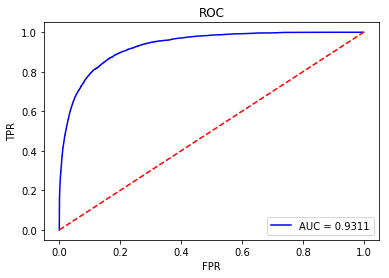

In [170]:
XGBclassifier(train_1,test_1,params1,steps = 20,threshold=0.45,target=40)

[03:39:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
93.71195982958004
AUC :  0.6536012963283109
Report :                precision    recall  f1-score   support

           0       0.94      0.99      0.97     72678
           1       0.73      0.32      0.44      6186

    accuracy                           0.94     78864
   macro avg       0.84      0.65      0.70     78864
weighted avg       0.93      0.94      0.93     78864



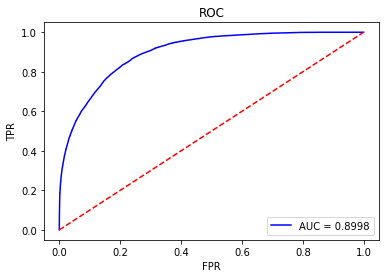

In [256]:
XGBclassifier(train_2,test_2,params1,steps = 20,threshold=0.45,target=40)

for regression

In [196]:
def XGBregression(train_regression,test_regression,params,steps,threshold,target):
    y_train = train_regression[target].values
    X_train = train_regression.drop([target],axis=1).values
    y_test = test_regression[target].values
    X_test = test_regression.drop([target],axis=1).values
    
    D_train = xgb.DMatrix(X_train, label=y_train)
    D_test = xgb.DMatrix(X_test, label=y_test)
    model = xgb.train(params, D_train, steps)
    preds = model.predict(D_test)
    
    r2sc = metrics.r2_score(y_test,preds)
    mse = metrics.mean_squared_error(y_test,preds)
    return r2sc,mse

In [233]:
params2 = {
    'objective':'reg:gamma',
    'learning_rate':0.1, 
    'n_estimators':100,
    'eta':0.1,
    'max_depth':10,
    'subsample':0.5
}

In [234]:
r2sc,mse = XGBregression(train_1,test_1,params2,steps=20,threshold=0.5,target=0)

In [235]:
r2sc

-3.2571587033900418

In [236]:
mse

1707.1825110384052

In [252]:
train_2 = train_2.drop(['22_37'],axis=1)

In [259]:
r2sc,mse = XGBregression(train_2,test_2,params2,steps=20,threshold=0.5,target=0)

In [260]:
r2sc,mse

(-3.252614409981194, 1705.3601833374355)

# Advanced: Try LightGBM

for classification

In [158]:
import lightgbm as lgb  

In [159]:
def LGBMclassifier(train_classifier,test_classifier,params,threshold=0.5):
    y_train = train_classifier[40]
    X_train = train_classifier.drop([40],axis=1)
    y_test = test_classifier[40]
    X_test = test_classifier.drop([40],axis=1)
    lgb_train = lgb.Dataset(X_train,y_train,free_raw_data=False)
    gbm = lgb.train(params,lgb_train)  
    preds = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    
    y_pred = []
    for pred in preds:  
        result = 1 if pred > threshold else 0  
        y_pred.append(result)
        
    print (accuracy_score(y_test,y_pred)*100) 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print("AUC : ",auc(false_positive_rate, true_positive_rate))
    print("Report : ", 
    classification_report(y_test, y_pred)) 
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc(y_test, preds)


In [57]:
params1 = { 'boosting_type': 'gbdt',
            'boosting': 'dart',
            'objective': 'binary',
            'metric': 'binary_logloss',
            'learning_rate': 0.01,
            'num_leaves':10,
            'max_depth':10,
            "min_data_in_leaf": 100,
            'feature_fraction': 0.8,
            'bagging_fraction': 1,
            'bagging_freq':10,
            'lambda_l1':0.1,
            'lambda_l2':0.01,
            'nthread':4,
            'min_split_gain': 0,
             'subsample': 0.8, 
            'colsample_bytree': 0.8}

In [161]:
params2 = {  
    'boosting_type': 'gbdt',  
    'objective': 'binary',  
    'metric': {'binary_logloss', 'auc'},  
    'num_leaves': 5,  
    'max_depth': 6,  
    'min_data_in_leaf': 450,  
    'learning_rate': 0.1,  
    'feature_fraction': 0.9,  
    'bagging_fraction': 0.95,  
    'bagging_freq': 5,  
    'lambda_l1': 1,    
    'lambda_l2': 0.001,  
    'min_gain_to_split': 0.2,  
    'verbose': 5,  
    'is_unbalance': True  
}  

In [160]:
params3 = {
    'boosting_type': 'gbdt', 
    'objective': 'binary', 

    'learning_rate': 0.1, 
    'num_leaves': 10, 
    'max_depth': 10,

    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
    'is_unbalance': True  
    }

In [59]:
LGBMclassifier(train_classifier,test_classifier,params1,threshold=0.5)

92.2968654899574
AUC :  0.5092676640266652
Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96     72678
           1       0.97      0.02      0.04      6186

    accuracy                           0.92     78864
   macro avg       0.94      0.51      0.50     78864
weighted avg       0.93      0.92      0.89     78864



87.29711909109353
AUC :  0.8359824098479485
Report :                precision    recall  f1-score   support

           0       0.98      0.88      0.93     72678
           1       0.36      0.79      0.49      6186

    accuracy                           0.87     78864
   macro avg       0.67      0.84      0.71     78864
weighted avg       0.93      0.87      0.89     78864



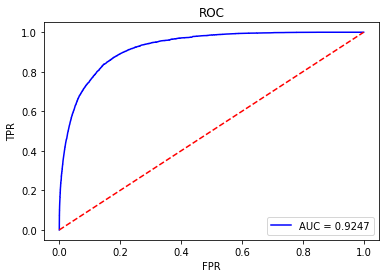

In [91]:
LGBMclassifier(train_classifier,test_classifier,params2,threshold=0.5)

86.48305944410632
AUC :  0.8564122003520624
Report :                precision    recall  f1-score   support

           0       0.99      0.87      0.92     72678
           1       0.35      0.85      0.50      6186

    accuracy                           0.86     78864
   macro avg       0.67      0.86      0.71     78864
weighted avg       0.94      0.86      0.89     78864



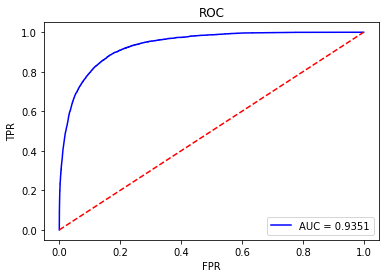

In [163]:
LGBMclassifier(train_1,test_1,params3,threshold=0.45)

75.23584905660378
AUC :  0.8166866357000514
Report :                precision    recall  f1-score   support

           0       0.99      0.74      0.85     72678
           1       0.23      0.89      0.36      6186

    accuracy                           0.75     78864
   macro avg       0.61      0.82      0.60     78864
weighted avg       0.93      0.75      0.81     78864



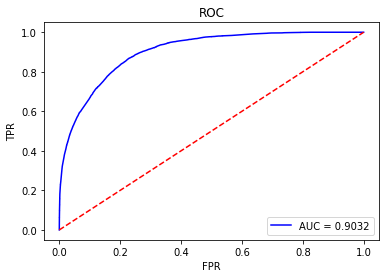

In [257]:
LGBMclassifier(train_2,test_2,params3,threshold=0.45)

for regression

In [209]:
def LGBMregression(train_regression,test_regression,params,target):
    y_train = train_regression[target].values
    X_train = train_regression.drop([target],axis=1).values
    y_test = test_regression[target].values
    X_test = test_regression.drop([target],axis=1).values
    
    lgb_train = lgb.Dataset(X_train,y_train,free_raw_data=False)
    gbm = lgb.train(params,lgb_train)  
    preds = gbm.predict(X_test)

    r2sc = metrics.r2_score(y_test,preds)
    mse = metrics.mean_squared_error(y_test,preds)
    return r2sc,mse


In [210]:
params4 = {
    "objective": "regression",
    "metric": "mse",
    "learning_rate": 0.01,
    "bagging_fraction": 0.8,
    "feature_fraction": 0.8,
    "verbosity": -1
}

In [211]:
r2sc,mse = LGBMregression(train_1,test_1,params4,0)

In [212]:
r2sc

0.42962543110556206

In [213]:
mse

228.728491606915

In [228]:
r2sc,mse = LGBMregression(train_2,test_2,params4,0)

In [230]:
r2sc,mse

(0.10037408382275248, 360.7630670079782)